<a href="https://colab.research.google.com/github/victorjms/face_recognition/blob/main/Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Victor Montenegro
Tu segundo proyecto tendrá mucha más libertad que tu primer proyecto. Esto se debe a que queremos que tengas un proyecto en tu cartera que te interese o se relacione con la industria en la que te gustaría trabajar.

Tu tarea para esta semana es seleccionar el conjunto de datos con el que te gustaría trabajar para el Proyecto 2. Estos datos pueden ser de cualquier fuente y pueden ser sobre cualquier tema, solo asegúrate de que la licencia indique que puedes usarlos. Asegúrate de seleccionar un conjunto de datos con el que sea razonable trabajar en la cantidad de tiempo que nos queda. Piensa en las preguntas que podrías responder razonablemente con el conjunto de datos que selecciones. Debes seleccionar un conjunto de datos que tenga algún tipo de componente de aprendizaje automático (supervisado o no supervisado).

# Algunas preguntas a considerar:

## ¿Qué tipo de preguntas sobre ciencia de datos puedes responder en función de tus datos?
Como se componen los datos capaces de predecir imágenes
## ¿Es esta una tarea supervisada o no supervisada?
supervisada
## Si se trata de una tarea supervisada, ¿es una tarea de regresión o clasificación?
clasificación
## ¿Qué tan limpios están tus datos?
bastante limpios
## ¿Qué problemas crees que pueden surgir?
si no está lo suficientemente entrenado puede omitir o confundir rostros

In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

In [ ]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
# importamos el conjunto de datos
from sklearn.datasets import fetch_lfw_people
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size':14})
# colocamos el conjunto de datos en un avariable
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [ ]:
# Obtener Imagenes
n_samples, h, w = faces.images.shape
npix = h*w

# Data en 2D
X = faces.data
n_features = X.shape[1]

# Labels of images
y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

print('Image size     = {0:d} x {1:d} = {2:d} pixels'.format(h,w,npix))
print('Number faces   = {0:d}'.format(n_samples))
print('Number classes = {0:d}'.format(n_classes))

Image size     = 62 x 47 = 2914 pixels
Number faces   = 1348
Number classes = 8


In [ ]:
n_samples

1348

In [ ]:
n_samples / n_classes

168.5

# Graficando rostros

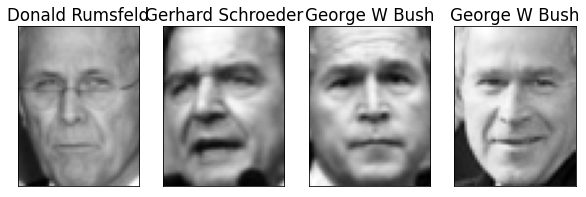

In [ ]:
def plt_face(x):
    h = 62
    w = 47
    plt.imshow(x.reshape((h,w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
  
I = np.random.permutation(n_samples)
plt.figure(figsize=(10,20))
nplt = 4;
for i in range(nplt):
    ind = I[i]
    plt.subplot(1,nplt,i+1)
    plt_face(X[ind])
    plt.title(target_names[y[ind]])

Estimación de los componentes principales por medio de la desviación standar

In [ ]:
npix = h*w
Xmean = np.mean(X,0)
Xs = X - Xmean[None,:]

In [ ]:
U,S,Vtr = np.linalg.svd(Xs, full_matrices=False)

Text(0, 0.5, 'PoV')

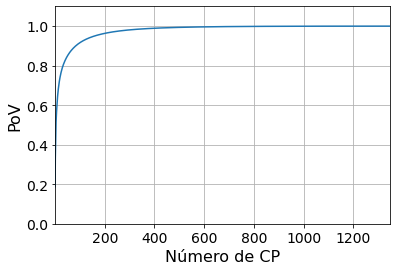

In [ ]:
lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.grid()
plt.axis([1,n_samples,0, 1.1])
plt.xlabel('Número de CP', fontsize=16)
plt.ylabel('PoV', fontsize=16)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

#from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


print(__doc__)



Automatically created module for IPython interactive environment


In [ ]:
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
n_components = 150

print("Extrayendo las %d 'Eigenfaces' superiores de %d caras"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print("realizado en %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Proyectar los datos de entrada sobre la base ortonormal de las 'Eigenfaces'")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("realizado en %0.3fs" % (time() - t0))

Extrayendo las 150 'Eigenfaces' superiores de 1011 caras
realizado en 0.800s
Proyectar los datos de entrada sobre la base ortonormal de las 'Eigenfaces'
realizado en 0.091s


In [ ]:
print("Ajustando el clasificador al set de entrenamiento")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("hecho en %0.3fs" % (time() - t0))
print("Mejor estimador encontrado en la búsqueda de la cuadrícula:")
print(clf.best_estimator_)

Ajustando el clasificador al set de entrenamiento
hecho en 16.189s
Mejor estimador encontrado en la búsqueda de la cuadrícula:
SVC(C=2227.001815375288, class_weight='balanced', gamma=0.0032989340702780034)


Predicting people's names on the test set
done in 0.159s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.64      0.78        22
     Colin Powell       0.75      0.93      0.83        46
  Donald Rumsfeld       0.83      0.83      0.83        23
    George W Bush       0.88      0.92      0.90       144
Gerhard Schroeder       0.85      0.83      0.84        35
      Hugo Chavez       1.00      0.62      0.77        16
Junichiro Koizumi       1.00      0.75      0.86        16
       Tony Blair       0.75      0.77      0.76        35

         accuracy                           0.85       337
        macro avg       0.88      0.79      0.82       337
     weighted avg       0.86      0.85      0.85       337



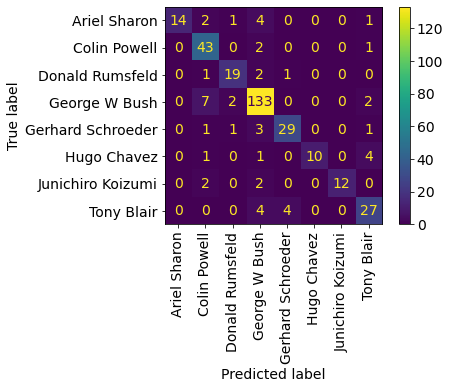

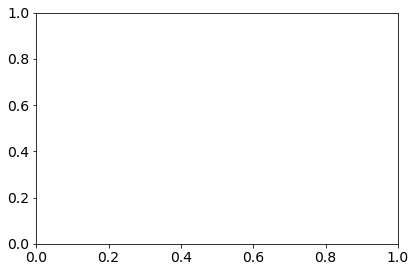

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
fig, ax = plt.subplots()
#example_plot(ax, fontsize=24)
plt.tight_layout()
plt.show()

Predicting people's names on the test set
done in 0.097s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.64      0.78        22
     Colin Powell       0.75      0.93      0.83        46
  Donald Rumsfeld       0.83      0.83      0.83        23
    George W Bush       0.88      0.92      0.90       144
Gerhard Schroeder       0.85      0.83      0.84        35
      Hugo Chavez       1.00      0.62      0.77        16
Junichiro Koizumi       1.00      0.75      0.86        16
       Tony Blair       0.75      0.77      0.76        35

         accuracy                           0.85       337
        macro avg       0.88      0.79      0.82       337
     weighted avg       0.86      0.85      0.85       337



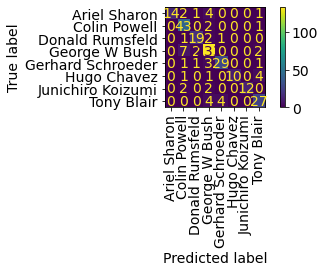

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Instanciar y ajustar clasificador de potenciación de gradiente
xgb = XGBClassifier()
xgb.fit(X_train, y_train)



XGBClassifier(objective='multi:softprob')

In [ ]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.7359050445103857


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
# Cree una tubería para escalado, PCA y regresión logística
pipe = make_pipeline(StandardScaler(), PCA(n_components = 7), LogisticRegression())
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=7)),
                ('logisticregression', LogisticRegression())])

In [ ]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.44708209693372897
Testing accuracy: 0.4836795252225519


In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

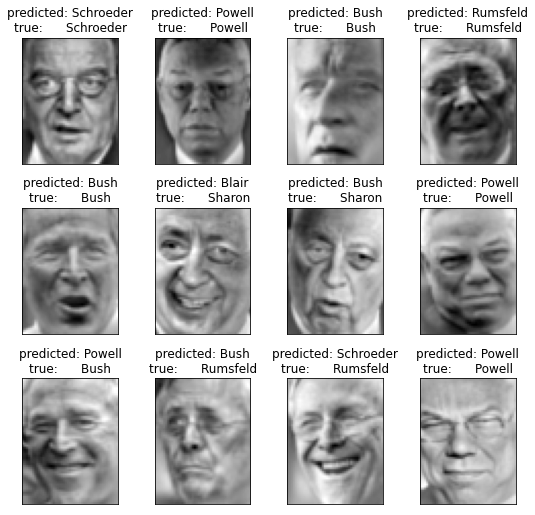

In [ ]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

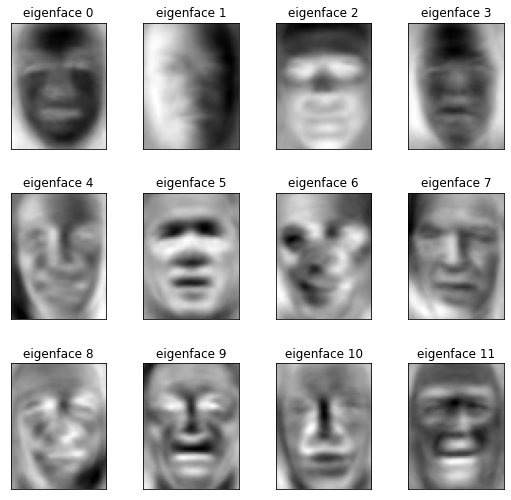

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()